In [5]:
import random

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from torch import nn
from torchtext.legacy import data
from tqdm import tqdm

from util import init_device, load_params
from util.mmd import run_test
from util.model import MMD, MyEmbedding, MyMLP
from util.nlp_preprocessing import dataframe2dataset, tokenizer_en, tokenizer_ja

GPU available: cuda
Loading parameters...
 ja_train_path:	 /workspace/data/dataset_ja_train.json
 ja_dev_path:	 /workspace/data/dataset_ja_dev.json
 ja_test_path:	 /workspace/data/dataset_ja_test.json
 en_train_path:	 /workspace/data/dataset_en_train.json
 en_dev_path:	 /workspace/data/dataset_en_dev.json
 en_test_path:	 /workspace/data/dataset_en_test.json
 ja_vector_path:	 /workspace/amazon_review/weight/japanese_fasttext_vectors.vec
 is_developing:	 True
 source_category:	 home
 target_category:	 wireless
 target_ratio:	 0.3
 lambda:	 0.7
 use_pretrained_vector:	 False
 token_max_length:	 256
 batch_size:	 32
 emb_dim:	 300
 class_num:	 5
 criterion:	 CrossEntropyLoss
 lr:	 1e-05
 optimizer:	 Adam
 epochs:	 10
Source num: 100, Target num: 30
Building data iterator...


100%|██████████| 1/1 [00:00<00:00, 274.39it/s]


epoch 1 / 10
Loss -> Source: 0.000	Target: 0.000	MMD: 0.000	All: 0.000
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
6.25
18.75
21.875
21.875
25.0
28.125
37.5
40.625
40.625
43.75
43.75
46.875
50.0


56.25
59.375
65.625
71.875
78.125
78.125
84.375
93.75
93.75
103.125
112.5
121.875
128.125
131.25
131.25
131.25
140.625
150.0
150.0
150.0
150.0
150.0
150.0
150.0
150.0
150.0
150.0
150.0
150.0
150.0
150.0
150.0
150.0
150.0
150.0
150.0
150.0
150.0
150.0
150.0
150.0
150.0
150.0
150.0
150.0
150.0
150.0
150.0
153.125
156.25
159.375
165.625
171.875
171.875
175.0
184.375
184.375
193.75
209.375
225.0
228.125
231.25
237.5
250.0
250.0
253.125
256.25
259.375
268.75
278.125
287.5
300.0
309.375
315.625
331.25
337.5
343.75
353.125
356.25
362.5
443.75
537.5
618.75
709.375
787.5
865.625
953.125
1046.875
1137.5
1228.125
1306.25
1393.75
1487.5
1578.125
1671.875
1765.625
1846.875
1946.875
2037.5
2112.5
2190.625
2281.25
2368.75
2462.5
2546.875
2631.25
2728.125
2821.875
2915.625
3009.375
3090.625
3178.125

Dev source Accuracy: 20.24
Dev source F1 Score: 8.78
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0

100%|██████████| 1/1 [00:00<00:00, 286.67it/s]

2415.625
2453.125
2496.875
2556.25
2596.875
2637.5
2687.5
2737.5
2768.75
2806.25
2853.125
2881.25
2943.75

Dev target Accuracy: 18.75
Dev target F1 Score: 12.52

epoch 2 / 10
Loss -> Source: 0.000	Target: 0.000	MMD: 0.000	All: 0.000
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
6.25
18.75
21.875
21.875
25.0
28.125
37.5


40.625
40.625
43.75
43.75
46.875
50.0
56.25
59.375
65.625
71.875
78.125
78.125
84.375
93.75
93.75
103.125
112.5
121.875
128.125
131.25
131.25
131.25
140.625
150.0
150.0
150.0
150.0
150.0
150.0
150.0
150.0
150.0
150.0
150.0
150.0
150.0
150.0
150.0
150.0
150.0
150.0
150.0
150.0
150.0
150.0
150.0
150.0
150.0
150.0
150.0
150.0
150.0
150.0
150.0
153.125
156.25
159.375
165.625
171.875
171.875
175.0
184.375
184.375
193.75
209.375
225.0
228.125
231.25
237.5
250.0
250.0
253.125
256.25
259.375
268.75
278.125
287.5
300.0
309.375
315.625
331.25
337.5
343.75
353.125
356.25
362.5
443.75
537.5
618.75
709.375
787.5
865.625
953.125
1046.875
1137.5
1228.125
1306.25
1393.75
1487.5
1578.125
1671.875
1765.625
1846.875
1946.875
2037.5
2112.5
2190.625
2281.25
2368.75
2462.5
2546.875
2631.25
2728.125
2821.875
2915.625
3009.375
3090.625
3178.125

Dev source Accuracy: 20.24
Dev source F1 Score: 8.78
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0

100%|██████████| 1/1 [00:00<00:00, 261.26it/s]

2043.75
2090.625
2137.5
2190.625
2237.5
2293.75
2337.5
2378.125
2415.625
2453.125
2496.875
2556.25
2596.875
2637.5
2687.5
2737.5
2768.75
2806.25
2853.125
2881.25
2943.75

Dev target Accuracy: 18.75
Dev target F1 Score: 12.52

epoch 3 / 10
Loss -> Source: 0.000	Target: 0.000	MMD: 0.000	All: 0.000
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


0.0
0.0
0.0
6.25
18.75
21.875
21.875
25.0
28.125
37.5
40.625
40.625
43.75
43.75
46.875
50.0
56.25
59.375
65.625
71.875
78.125
78.125
84.375
93.75
93.75
103.125
112.5
121.875
128.125
131.25
131.25
131.25
140.625
150.0
150.0
150.0
150.0
150.0
150.0
150.0
150.0
150.0
150.0
150.0
150.0
150.0
150.0
150.0
150.0
150.0
150.0
150.0
150.0
150.0
150.0
150.0
150.0
150.0
150.0
150.0
150.0
150.0
150.0
150.0
153.125
156.25
159.375
165.625
171.875
171.875
175.0
184.375
184.375
193.75
209.375
225.0
228.125
231.25
237.5
250.0
250.0
253.125
256.25
259.375
268.75
278.125
287.5
300.0
309.375
315.625
331.25
337.5
343.75
353.125
356.25
362.5
443.75
537.5
618.75
709.375
787.5
865.625
953.125
1046.875
1137.5
1228.125
1306.25
1393.75
1487.5
1578.125
1671.875
1765.625
1846.875
1946.875
2037.5
2112.5
2190.625
2281.25
2368.75
2462.5
2546.875
2631.25
2728.125
2821.875
2915.625
3009.375
3090.625
3178.125

Dev source Accuracy: 20.24
Dev source F1 Score: 8.78
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0

100%|██████████| 1/1 [00:00<00:00, 252.23it/s]

1900.0
1950.0
2000.0
2043.75
2090.625
2137.5
2190.625
2237.5
2293.75
2337.5
2378.125
2415.625
2453.125
2496.875
2556.25
2596.875
2637.5
2687.5
2737.5
2768.75
2806.25
2853.125
2881.25
2943.75

Dev target Accuracy: 18.75
Dev target F1 Score: 12.52

epoch 4 / 10
Loss -> Source: 0.000	Target: 0.000	MMD: 0.000	All: 0.000
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


0.0
0.0
0.0
0.0
6.25
18.75
21.875
21.875
25.0
28.125
37.5
40.625
40.625
43.75
43.75
46.875
50.0
56.25
59.375
65.625
71.875
78.125
78.125
84.375
93.75
93.75
103.125
112.5
121.875
128.125
131.25
131.25
131.25
140.625
150.0
150.0
150.0
150.0
150.0
150.0
150.0
150.0
150.0
150.0
150.0
150.0
150.0
150.0
150.0
150.0
150.0
150.0
150.0
150.0
150.0
150.0
150.0
150.0
150.0
150.0
150.0
150.0
150.0
150.0
150.0
153.125
156.25
159.375
165.625
171.875
171.875
175.0
184.375
184.375
193.75
209.375
225.0
228.125
231.25
237.5
250.0
250.0
253.125
256.25
259.375
268.75
278.125
287.5
300.0
309.375
315.625
331.25
337.5
343.75
353.125
356.25
362.5
443.75
537.5
618.75
709.375
787.5
865.625
953.125
1046.875
1137.5
1228.125
1306.25
1393.75
1487.5
1578.125
1671.875
1765.625
1846.875
1946.875
2037.5
2112.5
2190.625
2281.25
2368.75
2462.5
2546.875
2631.25
2728.125
2821.875
2915.625
3009.375
3090.625
3178.125

Dev source Accuracy: 20.24
Dev source F1 Score: 8.78
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0

100%|██████████| 1/1 [00:00<00:00, 302.51it/s]

1950.0
2000.0
2043.75
2090.625
2137.5
2190.625
2237.5
2293.75
2337.5
2378.125
2415.625
2453.125
2496.875
2556.25
2596.875
2637.5
2687.5
2737.5
2768.75
2806.25
2853.125
2881.25
2943.75

Dev target Accuracy: 18.75
Dev target F1 Score: 12.52

epoch 5 / 10
Loss -> Source: 0.000	Target: 0.000	MMD: 0.000	All: 0.000
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


0.0
0.0
0.0
0.0
0.0
6.25
18.75
21.875
21.875
25.0
28.125
37.5
40.625
40.625
43.75
43.75
46.875
50.0
56.25
59.375
65.625
71.875
78.125
78.125
84.375
93.75
93.75
103.125
112.5
121.875
128.125
131.25
131.25
131.25
140.625
150.0
150.0
150.0
150.0
150.0
150.0
150.0
150.0
150.0
150.0
150.0
150.0
150.0
150.0
150.0
150.0
150.0
150.0
150.0
150.0
150.0
150.0
150.0
150.0
150.0
150.0
150.0
150.0
150.0
150.0
150.0
153.125
156.25
159.375
165.625
171.875
171.875
175.0
184.375
184.375
193.75
209.375
225.0
228.125
231.25
237.5
250.0
250.0
253.125
256.25
259.375
268.75
278.125
287.5
300.0
309.375
315.625
331.25
337.5
343.75
353.125
356.25
362.5
443.75
537.5
618.75
709.375
787.5
865.625
953.125
1046.875
1137.5
1228.125
1306.25
1393.75
1487.5
1578.125
1671.875
1765.625
1846.875
1946.875
2037.5
2112.5
2190.625
2281.25
2368.75
2462.5
2546.875
2631.25
2728.125
2821.875
2915.625
3009.375
3090.625
3178.125

Dev source Accuracy: 20.24
Dev source F1 Score: 8.78
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0

100%|██████████| 1/1 [00:00<00:00, 259.68it/s]

1700.0
1753.125
1806.25
1853.125
1900.0
1950.0
2000.0
2043.75
2090.625
2137.5
2190.625
2237.5
2293.75
2337.5
2378.125
2415.625
2453.125
2496.875
2556.25
2596.875
2637.5
2687.5
2737.5
2768.75
2806.25
2853.125
2881.25
2943.75

Dev target Accuracy: 18.75
Dev target F1 Score: 12.52

epoch 6 / 10
Loss -> Source: 0.000	Target: 0.000	MMD: 0.000	All: 0.000
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
6.25
18.75
21.875
21.875
25.0
28.125
37.5
40.625
40.625
43.75
43.75
46.875
50.0
56.25
59.375
65.625
71.875
78.125
78.125
84.375
93.75
93.75
103.125
112.5
121.875
128.125
131.25
131.25
131.25
140.625
150.0
150.0
150.0
150.0
150.0
150.0
150.0
150.0
150.0
150.0
150.0
150.0
150.0
150.0
150.0
150.0
150.0
150.0
150.0
150.0
150.0
150.0
150.0
150.0
150.0
150.0
150.0
150.0
150.0
150.0
150.0
153.125
156.25
159.375
165.625
171.875
171.875
175.0
184.375
184.375
193.75
209.375
225.0
228.125
231.25
237.5
250.0
250.0
253.125
256.25
259.375
268.75
278.125
287.5
300.0
309.375
315.625
331.25
337.5
343.75
353.125
356.25
362.5
443.75
537.5
618.75
709.375
787.5
865.625
953.125
1046.875
1137.5
1228.125
1306.25
1393.75
1487.5
1578.125
1671.875
1765.625
1846.875
1946.875
2037.5
2112.5
2190.625
2281.25
2368.75
2462.5
2546.875
2631.25
2728.125
2821.875
2915.625
3009.375
3090.625
3178.125

Dev source Accuracy: 20.24
Dev source F1 Score: 8.78
0.0
0.0
0.0
0.0
0.0
0.0
0.0

100%|██████████| 1/1 [00:00<00:00, 260.27it/s]

1806.25
1853.125
1900.0
1950.0
2000.0
2043.75
2090.625
2137.5
2190.625
2237.5
2293.75
2337.5
2378.125
2415.625
2453.125
2496.875
2556.25
2596.875
2637.5
2687.5
2737.5
2768.75
2806.25
2853.125
2881.25
2943.75

Dev target Accuracy: 18.75
Dev target F1 Score: 12.52

epoch 7 / 10
Loss -> Source: 0.000	Target: 0.000	MMD: 0.000	All: 0.000
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
6.25
18.75
21.875
21.875
25.0
28.125
37.5
40.625
40.625
43.75
43.75
46.875
50.0
56.25
59.375
65.625
71.875
78.125
78.125
84.375
93.75
93.75
103.125
112.5
121.875
128.125
131.25
131.25
131.25
140.625
150.0
150.0
150.0
150.0
150.0
150.0
150.0
150.0
150.0
150.0
150.0
150.0
150.0
150.0
150.0
150.0
150.0
150.0
150.0
150.0
150.0
150.0
150.0
150.0
150.0
150.0
150.0
150.0
150.0
150.0
150.0
153.125
156.25
159.375
165.625
171.875
171.875
175.0
184.375
184.375
193.75
209.375
225.0
228.125
231.25
237.5
250.0
250.0
253.125
256.25
259.375
268.75
278.125
287.5
300.0
309.375
315.625
331.25
337.5
343.75
353.125
356.25
362.5
443.75
537.5
618.75
709.375
787.5
865.625
953.125
1046.875
1137.5
1228.125
1306.25
1393.75
1487.5
1578.125
1671.875
1765.625
1846.875
1946.875
2037.5
2112.5
2190.625
2281.25
2368.75
2462.5
2546.875
2631.25
2728.125
2821.875
2915.625
3009.375
3090.625
3178.125

Dev source Accuracy: 20.24
Dev source F1 Score: 8.78
0.0
0.0
0.0
0.0
0.0
0.0
0.0

100%|██████████| 1/1 [00:00<00:00, 292.49it/s]

1306.25
1356.25
1406.25
1453.125
1490.625
1528.125
1581.25
1618.75
1659.375
1700.0
1753.125
1806.25
1853.125
1900.0
1950.0
2000.0
2043.75
2090.625
2137.5
2190.625
2237.5
2293.75
2337.5
2378.125
2415.625
2453.125
2496.875
2556.25
2596.875
2637.5
2687.5
2737.5
2768.75
2806.25
2853.125
2881.25
2943.75

Dev target Accuracy: 18.75
Dev target F1 Score: 12.52

epoch 8 / 10
Loss -> Source: 0.000	Target: 0.000	MMD: 0.000	All: 0.000
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
6.25
18.75
21.875
21.875
25.0
28.125
37.5
40.625
40.625
43.75
43.75
46.875
50.0
56.25
59.375
65.625
71.875
78.125
78.125
84.375
93.75
93.75
103.125
112.5
121.875
128.125
131.25
131.25
131.25
140.625
150.0
150.0
150.0
150.0
150.0
150.0
150.0
150.0
150.0
150.0
150.0
150.0
150.0
150.0
150.0
150.0
150.0
150.0
150.0
150.0
150.0
150.0
150.0
150.0
150.0
150.0
150.0
150.0
150.0
150.0
150.0
153.125
156.25
159.375
165.625
171.875
171.875
175.0
184.375
184.375
193.75
209.375
225.0
228.125
231.25
237.5
250.0
250.0
253.125
256.25
259.375
268.75
278.125
287.5
300.0
309.375
315.625
331.25
337.5
343.75
353.125
356.25
362.5
443.75
537.5
618.75
709.375
787.5
865.625
953.125
1046.875
1137.5
1228.125
1306.25
1393.75
1487.5
1578.125
1671.875
1765.625
1846.875
1946.875
2037.5
2112.5
2190.625
2281.25
2368.75
2462.5
2546.875
2631.25
2728.125
2821.875
2915.625
3009.375
3090.625
3178.125

Dev source Accuracy: 20.24
Dev source F1 Score: 8.78
0.0

100%|██████████| 1/1 [00:00<00:00, 267.10it/s]

1056.25
1106.25
1156.25
1218.75
1268.75
1306.25
1356.25
1406.25
1453.125
1490.625
1528.125
1581.25
1618.75
1659.375
1700.0
1753.125
1806.25
1853.125
1900.0
1950.0
2000.0
2043.75
2090.625
2137.5
2190.625
2237.5
2293.75
2337.5
2378.125
2415.625
2453.125
2496.875
2556.25
2596.875
2637.5
2687.5
2737.5
2768.75
2806.25
2853.125
2881.25
2943.75

Dev target Accuracy: 18.75
Dev target F1 Score: 12.52

epoch 9 / 10
Loss -> Source: 0.000	Target: 0.000	MMD: 0.000	All: 0.000
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
6.25
18.75
21.875
21.875
25.0
28.125
37.5
40.625
40.625
43.75
43.75
46.875
50.0
56.25
59.375
65.625
71.875
78.125
78.125
84.375
93.75
93.75
103.125
112.5
121.875
128.125
131.25
131.25
131.25
140.625
150.0
150.0
150.0
150.0
150.0
150.0
150.0
150.0
150.0
150.0
150.0
150.0
150.0
150.0
150.0
150.0
150.0
150.0
150.0
150.0
150.0
150.0
150.0
150.0
150.0
150.0
150.0
150.0
150.0
150.0
150.0
153.125
156.25
159.375
165.625
171.875
171.875
175.0
184.375
184.375
193.75
209.375
225.0
228.125
231.25
237.5
250.0
250.0
253.125
256.25
259.375
268.75
278.125
287.5
300.0
309.375
315.625
331.25
337.5
343.75
353.125
356.25
362.5
443.75
537.5
618.75
709.375
787.5
865.625
953.125
1046.875
1137.5
1228.125
1306.25
1393.75
1487.5
1578.125
1671.875
1765.625
1846.875
1946.875
2037.5
2112.5
2190.625
2281.25
2368.75
2462.5
2546.875
2631.25
2728.125
2821.875
2915.625
3009.375
3090.625
3178.125

Dev source Accuracy: 20.24
Dev s

100%|██████████| 1/1 [00:00<00:00, 269.92it/s]

975.0
1015.625
1056.25
1106.25
1156.25
1218.75
1268.75
1306.25
1356.25
1406.25
1453.125
1490.625
1528.125
1581.25
1618.75
1659.375
1700.0
1753.125
1806.25
1853.125
1900.0
1950.0
2000.0
2043.75
2090.625
2137.5
2190.625
2237.5
2293.75
2337.5
2378.125
2415.625
2453.125
2496.875
2556.25
2596.875
2637.5
2687.5
2737.5
2768.75
2806.25
2853.125
2881.25
2943.75

Dev target Accuracy: 18.75
Dev target F1 Score: 12.52

epoch 10 / 10
Loss -> Source: 0.000	Target: 0.000	MMD: 0.000	All: 0.000
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
6.25
18.75
21.875
21.875
25.0
28.125
37.5
40.625
40.625
43.75
43.75
46.875
50.0
56.25
59.375
65.625
71.875
78.125
78.125
84.375
93.75
93.75
103.125
112.5
121.875
128.125
131.25
131.25
131.25
140.625
150.0
150.0
150.0
150.0
150.0
150.0
150.0
150.0
150.0
150.0
150.0
150.0
150.0
150.0
150.0
150.0
150.0
150.0
150.0
150.0
150.0
150.0
150.0
150.0
150.0
150.0
150.0
150.0
150.0
150.0
150.0
153.125
156.25
159.375
165.625
171.875
171.875
175.0
184.375
184.375
193.75
209.375
225.0
228.125
231.25
237.5
250.0
250.0
253.125
256.25
259.375
268.75
278.125
287.5
300.0
309.375
315.625
331.25
337.5
343.75
353.125
356.25
362.5
443.75
537.5
618.75
709.375
787.5
865.625
953.125
1046.875
1137.5
1228.125
1306.25
1393.75
1487.5
1578.125
1671.875
1765.625
1846.875
1946.875
2037.5
2112.5
2190.625
2281.25
2368.75
2462.5
2546.875
2631.25
2728.125
2821.875
2915.625
3009.375
3090.625
3178.125

Dev source Accuracy: 20.24
D

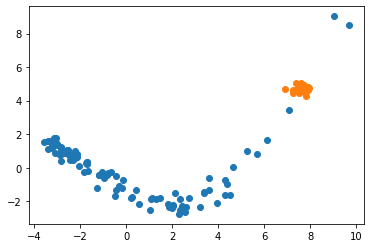

array([[  0,   1,   0, 528, 471],
       [  0,   0,   0, 478, 522],
       [  0,   0,   0, 476, 524],
       [  0,   0,   0, 488, 512],
       [  0,   0,   0, 524, 476]])

In [6]:
seed = 0
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
torch.backends.cudnn.benchmark = False
torch.backends.cudnn.deterministic = True
device = init_device()

print("Loading parameters...")
params = load_params("/workspace/amazon_review/config/params_mmd.json")

# データセット読み込み
train_source_df = pd.read_json(params["ja_train_path"], orient="record", lines=True)
if params["is_developing"]:
    train_source_df = train_source_df.sample(n=100, random_state=1)
dev_source_df = pd.read_json(params["ja_dev_path"], orient="record", lines=True)
test_source_df = pd.read_json(params["ja_test_path"], orient="record", lines=True)
train_target_df = pd.read_json(params["en_train_path"], orient="record", lines=True)
if params["is_developing"]:
    train_target_df = train_target_df.sample(n=100, random_state=1)
dev_target_df = pd.read_json(params["en_dev_path"], orient="record", lines=True)
test_target_df = pd.read_json(params["en_test_path"], orient="record", lines=True)

# targetドメインの割合を減らす
# targetの分類性能を下げるため
train_target_num = int(min(train_source_df.shape[0] * params["target_ratio"], train_target_df.shape[0]))
train_target_df = train_target_df.sample(train_target_num, replace=False)
print(f"Source num: {train_source_df.shape[0]}, Target num: {train_target_df.shape[0]}")

# クラスラベル設定
for df in [train_source_df, dev_source_df, test_source_df, train_target_df, dev_target_df, test_target_df]:
    # 3以上かを予測する場合
    # df["class"] = 0
    # df["class"][df["stars"] > 3] = 1

    # 5クラス分類する場合
    df["class"] = df["stars"] - 1

# フィールド作成
print("Building data iterator...")
source_text_field = data.Field(
    sequential=True,
    tokenize=tokenizer_ja,
    use_vocab=True,
    lower=True,
    include_lengths=True,
    batch_first=True,
    fix_length=params["token_max_length"],
    init_token="<cls>",
    eos_token="<eos>",
)
target_text_field = data.Field(
    sequential=True,
    tokenize=tokenizer_en,
    use_vocab=True,
    lower=True,
    include_lengths=True,
    batch_first=True,
    fix_length=params["token_max_length"],
    init_token="<cls>",
    eos_token="<eos>",
)
label_field = data.Field(sequential=False, use_vocab=False)
ja_fields = [("text", source_text_field), ("label", label_field)]
en_fields = [("text", target_text_field), ("label", label_field)]

# データセット作成
columns = ["review_body", "class"]
train_source_dataset = dataframe2dataset(train_source_df, ja_fields, columns)
dev_source_dataset = dataframe2dataset(dev_source_df, ja_fields, columns)
test_source_dataset = dataframe2dataset(test_source_df, ja_fields, columns)
train_target_dataset = dataframe2dataset(train_target_df, en_fields, columns)
dev_target_dataset = dataframe2dataset(dev_target_df, en_fields, columns)
test_target_dataset = dataframe2dataset(test_target_df, en_fields, columns)

# embedding作成
source_text_field.build_vocab(train_source_dataset, min_freq=1)
target_text_field.build_vocab(train_target_dataset, min_freq=1)

# データローダー
# train_source_iter = data.BucketIterator(dataset=train_source_dataset, batch_size=params["batch_size"], train=True)
dev_source_iter = data.BucketIterator(
    dataset=dev_source_dataset, batch_size=params["batch_size"], train=False, sort=False
)
test_source_iter = data.BucketIterator(
    dataset=test_source_dataset, batch_size=params["batch_size"], train=False, sort=False
)
train_target_iter = data.BucketIterator(dataset=train_target_dataset, batch_size=params["batch_size"], train=True)
dev_target_iter = data.BucketIterator(
    dataset=dev_target_dataset, batch_size=params["batch_size"], train=False, sort=False
)
test_target_iter = data.BucketIterator(
    dataset=test_target_dataset, batch_size=params["batch_size"], train=False, sort=False
)

# モデル構築
ja_v_size = len(source_text_field.vocab.stoi)
en_v_size = len(target_text_field.vocab.stoi)
source_embedding = MyEmbedding(params["emb_dim"], ja_v_size, params["token_max_length"]).to(device)
target_embedding = MyEmbedding(params["emb_dim"], en_v_size, params["token_max_length"]).to(device)
mlp = MyMLP(class_num=params["class_num"]).to(device)
criterion = getattr(nn, params["criterion"])()
mmd = MMD("rbf")

optimizer_s_emb = getattr(torch.optim, params["optimizer"])(source_embedding.parameters(), lr=params["lr"])
optimizer_t_emb = getattr(torch.optim, params["optimizer"])(target_embedding.parameters(), lr=params["lr"])
optimizer_mlp = getattr(torch.optim, params["optimizer"])(mlp.parameters(), lr=params["lr"])

split_ratio = len(train_target_dataset) / len(train_source_dataset)

# 訓練
for epoch in range(params["epochs"]):
    print(f"\nepoch {epoch+1} / {params['epochs']}")
    # 各lossの初期化
    total_source_loss = 0
    total_target_loss = 0
    total_mmd_loss = 0
    total_all_loss = 0

    random.seed(epoch)
    train_source_subset, _ = train_source_dataset.split(split_ratio=split_ratio)
    train_source_iter = data.BucketIterator(
        dataset=train_source_subset, batch_size=params["batch_size"], train=True
    )

    for i, (source_batch, target_batch) in tqdm(
        enumerate(zip(train_source_iter, train_target_iter)), total=len(train_source_iter)
    ):
        source_embedding.train()
        target_embedding.train()
        mlp.train()

        source_x, source_y = source_batch.text[0].to(device), (source_batch.label).to(device)
        target_x, target_y = target_batch.text[0].to(device), (target_batch.label).to(device)

        if source_x.shape[0] != params["batch_size"] or target_x.shape[0] != params["batch_size"]:
            continue

        source_embed = source_embedding(source_x)
        source_pred = mlp(source_embed)
        source_loss = criterion(source_pred, source_y)
        total_source_loss += source_loss.cpu()

        target_embed = target_embedding(target_x)
        target_pred = mlp(target_embed)
        target_loss = criterion(target_pred, target_y)
        total_target_loss += target_loss.cpu()

        if params["lambda"] == 0:
            all_loss = source_loss + target_loss
        else:
            mmd_loss = mmd(source_embed, target_embed)
            total_mmd_loss = mmd_loss.cpu()
            all_loss = source_loss + target_loss + params["lambda"] * mmd_loss

        optimizer_s_emb.zero_grad()
        optimizer_t_emb.zero_grad()
        optimizer_mlp.zero_grad()

        all_loss.backward()

        optimizer_s_emb.step()
        optimizer_t_emb.step()
        optimizer_mlp.step()
        total_all_loss += all_loss.cpu()

    mean_source_loss = total_source_loss / len(train_source_iter)
    mean_target_loss = total_target_loss / len(train_target_iter)
    mean_all_loss = total_all_loss / len(train_source_iter)
    if params["lambda"] == 0:
        print(f"Loss -> Source: {mean_source_loss:.3f}\tTarget: {mean_target_loss:.3f}\tAll: {mean_all_loss:.3f}")
    else:
        mean_mmd_loss = total_mmd_loss / len(train_source_iter)
        print(
            f"Loss -> Source: {mean_source_loss:.3f}\tTarget: {mean_target_loss:.3f}\tMMD: {mean_mmd_loss:.3f}\tAll: {mean_all_loss:.3f}"  # noqa #E501
        )

    dev_source_accuracy, dev_source_f1 = run_test(source_embedding, mlp, dev_source_iter, device)
    print(f"\nDev source Accuracy: {dev_source_accuracy:.2f}")
    print(f"Dev source F1 Score: {dev_source_f1:.2f}")
    dev_target_accuracy, dev_target_f1 = run_test(target_embedding, mlp, dev_target_iter, device)
    print(f"\nDev target Accuracy: {dev_target_accuracy:.2f}")
    print(f"Dev target F1 Score: {dev_target_f1:.2f}")

test_source_accuracy, test_source_f1 = run_test(source_embedding, mlp, test_source_iter, device)
print(f"\nTest source Accuracy: {test_source_accuracy:.2f}")
print(f"Test source F1 Score: {test_source_f1:.2f}")
test_target_accuracy, test_target_f1 = run_test(target_embedding, mlp, test_target_iter, device)
print(f"\nTest target Accuracy: {test_target_accuracy:.2f}")
print(f"Test target F1 Score: {test_target_f1:.2f}")

# 特徴量可視化
source_embedding.eval()
target_embedding.eval()

train_source_iter = data.BucketIterator(dataset=train_source_dataset, batch_size=params["batch_size"], train=True)
source_embedding_list = []
for batch in train_source_iter:
    x, _ = batch.text[0].to(device), (batch.label).to(device)
    with torch.no_grad():
        embedding = source_embedding(x)
    source_embedding_list.extend(embedding.cpu().numpy())
source_df = pd.DataFrame(np.array(source_embedding_list))

target_embedding_list = []
for batch in train_target_iter:
    x, _ = batch.text[0].to(device), (batch.label).to(device)
    with torch.no_grad():
        embedding = target_embedding(x)
    target_embedding_list.extend(embedding.cpu().numpy())
target_df = pd.DataFrame(np.array(target_embedding_list))

pca = PCA(n_components=2)
pca.fit(source_df)
source_pca_df = pca.transform(source_df)
target_pca_df = pca.transform(target_df)
source_pca_df.shape

plt.scatter(source_pca_df[:, 0], source_pca_df[:, 1])
plt.scatter(target_pca_df[:, 0], target_pca_df[:, 1])
plt.show()

label_list = []
pred_list = []
for batch in test_target_iter:
    x, y = batch.text[0].to(device), (batch.label).to(device)
    with torch.no_grad():
        embedding = target_embedding(x)
        pred = mlp(embedding)
    label_list.extend(list(y.cpu().numpy()))
    pred_list.extend(list(pred.cpu().numpy().argmax(1)))
confusion_matrix(label_list, pred_list)